In [15]:
#region imports
from IPython import get_ipython

# noinspection PyBroadException
try:
    _magic = get_ipython().run_line_magic
    _magic("load_ext", "autoreload")
    _magic("autoreload", "2")
except:
    pass

# noinspection PyUnresolvedReferences
import datetime as dt
# noinspection PyUnresolvedReferences
import glob
# noinspection PyUnresolvedReferences
import os
# noinspection PyUnresolvedReferences
import pprint
# noinspection PyUnresolvedReferences
import sys
# noinspection PyUnresolvedReferences
import cartopy as crt
# noinspection PyUnresolvedReferences
import matplotlib as mpl
# noinspection PyUnresolvedReferences
import matplotlib.colors
# noinspection PyUnresolvedReferences
import matplotlib.pyplot as plt
# noinspection PyUnresolvedReferences
import numpy as np
# noinspection PyUnresolvedReferences
import pandas as pd
# noinspection PyUnresolvedReferences
import seaborn as sns
# noinspection PyUnresolvedReferences
import xarray as xr
# noinspection PyUnresolvedReferences
import bnn_tools.bnn_array
import bnn_tools.basic_funs as bu

import funs as fu

plt.style.use('default')
xr.set_options(
    display_expand_data = False,
    display_expand_data_vars = True,
    display_max_rows = 10,
    display_style = 'html',
    display_width = 80,
    display_expand_attrs = False
);
#endregion

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
p = '../data/data_orig/dmps_hyy_1hour.xlsx'

d1 = (
    pd.read_excel(p)
)


In [31]:
d2 = (
    d1
    .rename({'Unnamed: 0':'time'},axis=1)
    .assign(**{'time':lambda d:pd.to_datetime(d['time'])})
    .set_index('time')
    .stack()
    .to_xarray()
    .rename({'level_1':'Dp'})
    .assign_coords({'Dp':lambda d:d['Dp'].astype(float)*1e-9})
    .rename('dndlDp')
    .sortby('time')
    .resample({'time':'60T'}).median()


)

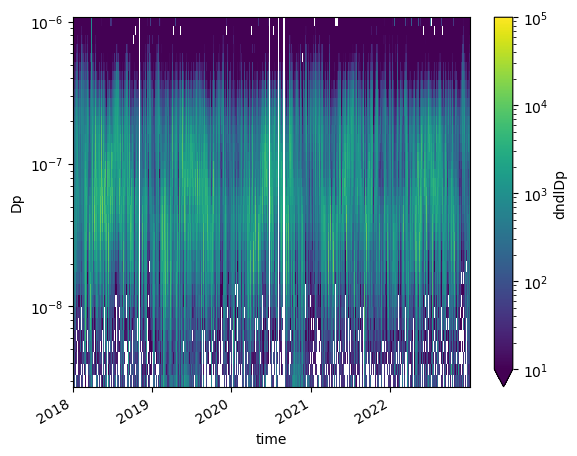

In [32]:
(
    d2.plot(
        x='time',
        yscale='log',
        norm = mpl.colors.LogNorm(vmin=1e1,vmax=1e5)
    )
)

In [33]:
d3 = (
    d2
    .pipe(bu.dp_regrid,log_dy=.05,n_subs=10)
    .pipe(bu.set_Dp)
    .pipe(bu.upsample_ts,15*60)
)

In [35]:
d3.to_netcdf('../data/d1/npsd-hy-dmps.nc')

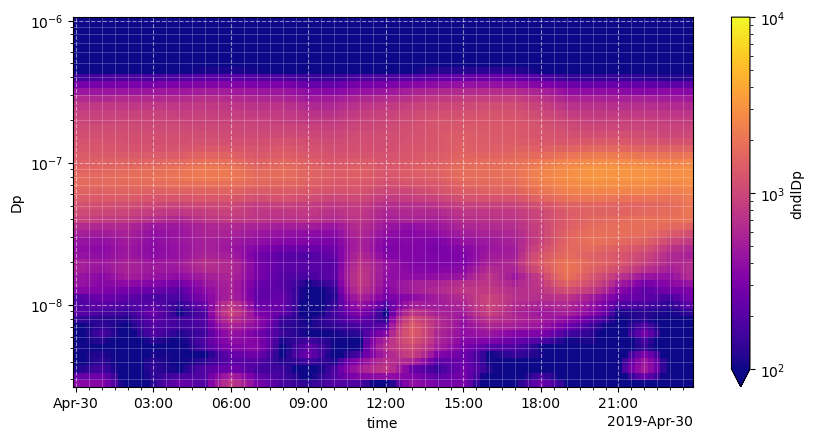

In [29]:
(
    d3
    .loc[{'time':'2019-04-30'}]
    .pipe(bu.plot_psd,vmin=1e2,vmax=1e4)
)